# Trial SRM Analysis
This notebook is designed to demonstrate the use of python to perform basic SRM analysis. This is intended to serve as a proof of concept for using python across the PFU teams data analysis needs.\

Advantages of this include:

    • Greater manouverability to produce the required graphs exactly as intended.
    • Ease of cleaning data
    • Faster Processing times
    • Wider range of sophisticated data analysis techniques readily available
    • Option to demonstrate FMA's ability to perform at a level that is not currently available in the PMO
    
Disadvantages of this include:

    • Less intuative interface excludes non technical colleagues from examining the data analysis process
    • Potentially less capacity to identify errors (To be confirmed)
    • Greater levels of training required for staff
    • Greater difficulty of training PMO staff


In [2]:
# IMPORTS AND STANDING DATA
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#status standing data
current_status = pd.read_csv(r'/Users/leogallagher/Documents/FMA-Work/KRG/PFM/Code/Expenditure/SRM/Index/Standing Data/Standing-Data - current-status.csv')
current_status['Current State'] = current_status['Current State'].str.upper()
#current_status.head(5)

In [4]:
# Import Raw Data and drop unneeded columns
df = pd.read_csv(r'/Users/leogallagher/Documents/FMA-Work/KRG/PFM/Code/Expenditure/SRM/Index/Raw Data/230211-SRM.csv', low_memory=False)
#df
# Columns to keep immediately
df_columns_to_keep = [
        'Srid','Date Submitted To Mofe','Approval Number Issued At','Ministry Input Id Issued At',
        'Ministry Id Issued At','Ministry Diwan Reviewer Action Date','Ministry Diwan Decision Maker Action Date',
        'Entity','Account Code','Exchange Rate','Total Cost Of Line','Amended Total Cost Of Line',
        'Savings Of Line','Total Sr Savings','Spending Team Action','Spending Team Action Date',
        'Price Evaluation Action','Price Evaluation Action Date','Engineering Directorate Action',
        'Engineering Directorate Action Date','Publications Directorate Action','Publications Directorate Action Date',
        'Director Of Spending Action','Director Of Spending Action Date','Dg Pa Action','Dg Pa Action Date',
        'Minister Of Finance Action','Minister Of Finance Action Date','Com Action','Com Action Date',
        'Second Round Ministry Diwan Reviewer Action Date','Second Round Ministry Diwan Decision Maker Action Date',
        'Second Round Spending Team Action Date','Second Round Director Of Spending Action Date',
        'Second Round Dg Pa Action Date','Second Round Minister Of Finance Action Date','Second Round Com Action Date',
        'Second Round Final Approval Date','Final Approval Date','Current State']
df_filtered = df.loc[:, df_columns_to_keep]
df_filtered['Current State'] = df_filtered['Current State'].str.upper()
df_filtered.head(5)



,Srid,Date Submitted To Mofe,Approval Number Issued At,Ministry Input Id Issued At,Ministry Id Issued At,Ministry Diwan Reviewer Action Date,Ministry Diwan Decision Maker Action Date,Entity,Account Code,Exchange Rate,...,Second Round Ministry Diwan Reviewer Action Date,Second Round Ministry Diwan Decision Maker Action Date,Second Round Spending Team Action Date,Second Round Director Of Spending Action Date,Second Round Dg Pa Action Date,Second Round Minister Of Finance Action Date,Second Round Com Action Date,Second Round Final Approval Date,Final Approval Date,Current State
0,SRID-1,2020-07-20 10:29 pm,2020-10-15,2020-07-20,2020-07-20,-,2020-07-20 10:29 pm,وەزارەتی گواستنەوە و گەیاندن,2-01-02-09-02-00,1.0,...,-,-,-,-,-,-,-,-,2020-10-15,OUTPUT ID ISSUED
1,SRID-1,2020-07-20 10:29 pm,2020-10-15,2020-07-20,2020-07-20,-,2020-07-20 10:29 pm,وەزارەتی گواستنەوە و گەیاندن,2-01-04-07-00-00,1.0,...,-,-,-,-,-,-,-,-,2020-10-15,OUTPUT ID ISSUED
2,SRID-1,2020-07-20 10:29 pm,2020-10-15,2020-07-20,2020-07-20,-,2020-07-20 10:29 pm,وەزارەتی گواستنەوە و گەیاندن,2-01-03-08-02-00,1.0,...,-,-,-,-,-,-,-,-,2020-10-15,OUTPUT ID ISSUED
3,SRID-1,2020-07-20 10:29 pm,2020-10-15,2020-07-20,2020-07-20,-,2020-07-20 10:29 pm,وەزارەتی گواستنەوە و گەیاندن,2-01-03-08-02-00,1.0,...,-,-,-,-,-,-,-,-,2020-10-15,OUTPUT ID ISSUED
4,SRID-1,2020-07-20 10:29 pm,2020-10-15,2020-07-20,2020-07-20,-,2020-07-20 10:29 pm,وەزارەتی گواستنەوە و گەیاندن,2-01-03-08-02-00,1.0,...,-,-,-,-,-,-,-,-,2020-10-15,OUTPUT ID ISSUED


In [12]:
# MOST RECENT ACTION
columns_to_include = [
        'Date Submitted To Mofe','Approval Number Issued At','Ministry Input Id Issued At',
        'Ministry Id Issued At','Ministry Diwan Reviewer Action Date','Ministry Diwan Decision Maker Action Date',
        'Spending Team Action Date',
        'Price Evaluation Action Date',
        'Engineering Directorate Action Date','Publications Directorate Action Date',
        'Director Of Spending Action Date','Dg Pa Action Date',
        'Minister Of Finance Action Date','Com Action Date',
        'Second Round Ministry Diwan Reviewer Action Date','Second Round Ministry Diwan Decision Maker Action Date',
        'Second Round Spending Team Action Date','Second Round Director Of Spending Action Date',
        'Second Round Dg Pa Action Date','Second Round Minister Of Finance Action Date',
        'Second Round Com Action Date','Second Round Final Approval Date','Final Approval Date']

df_filtered['Most Recent Action'] = df_filtered[columns_to_include].max(axis=1)

In [13]:

# convert date_column to datetime format
df_filtered['Most Recent Action'] = pd.to_datetime(df_filtered['Most Recent Action'], format='%Y-%m-%d %I:%M %p', errors='coerce').fillna(pd.to_datetime(df_filtered['Most Recent Action'], format='%Y-%m-%d', errors='coerce'))
#df_filtered['Most Recent Action']


In [14]:
df_filtered = pd.merge(df_filtered, current_status,how='left', on='Current State')
#df_filtered.head(5)
#current_status.head(10)

In [15]:
# ADD STATUS COLUMN
def final_status(row):
    if row[39] == "REVOKED" and row[1] == "":
        return "Not Submitted"
    
    elif row[39] == "REVOKED" and row[38] != "":
        if row[26] == "Approved by Minister of Finance" or row[26] == "Amended and Approved by Minister of Finance" or  row[26] == "Pending Tender":
            return "Revoked After Approval"
        
        elif row[28] == "Approved By Council Of Ministers" or row[28] == "Amended And Approved By Council Of Ministers" or row[28] == "Pending Tender By Council Of Ministers":
            return "Revoked After Approval"
        
        elif row[26] == "Rejected by Minister of Finance" or row[28] == ["Rejected By Council Of Ministers"]:
            return "Revoked After Rejection"
        
    elif row[42] == 'In Process':
        return 'In Process'
    
    elif row[42] == 'Not Submitted':
        return 'Not Submitted'
    
    elif row[42] == 'Revoked':
        return 'Revoked'
    
    elif row[42] == 'Rejected':
        return 'Rejected'
    
    elif row[42] == 'Approved':
        if row[13] == 0:
            return 'Approved'
        else:
            return 'Amended'
    else:
        return np.nan
df_filtered['Final Status'] = df_filtered.apply(final_status, axis=1)

# Make the table for the graph below here


In [16]:
# Volumes by status dataframe code
# define the index and columns
index = [datetime(2022,7,1),datetime(2022,8,1),datetime(2022,9,1),datetime(2022,10,1),
         datetime(2022,11,1),datetime(2022,12,1),datetime(2023,1,1),datetime(2023,2,1),
         datetime(2023,3,1),datetime(2023,4,1),datetime(2023,5,1),datetime(2023,6,1),
         datetime(2023,7,1)]
columns = ['Approved', 'Amended', 'Rejected']

# create an empty dictionary to store the calculated values
data = {}
for col in columns:
    data[col] = []

# loop through the date range and calculate the unique sum of Srid column
for i in range(len(index)-1):
    start_date = index[i]
    end_date = index[i+1]
    for col in columns:
        total = df_filtered[(df_filtered['Final Status'] == col) & 
                            (df_filtered['Most Recent Action'] >= start_date) &
                            (df_filtered['Most Recent Action'] < end_date)]['Srid'].nunique()
        data[col].append(total)

# create the dataframe
volume_by_status_df = pd.DataFrame(data=data, index=index[:-1], columns=columns)


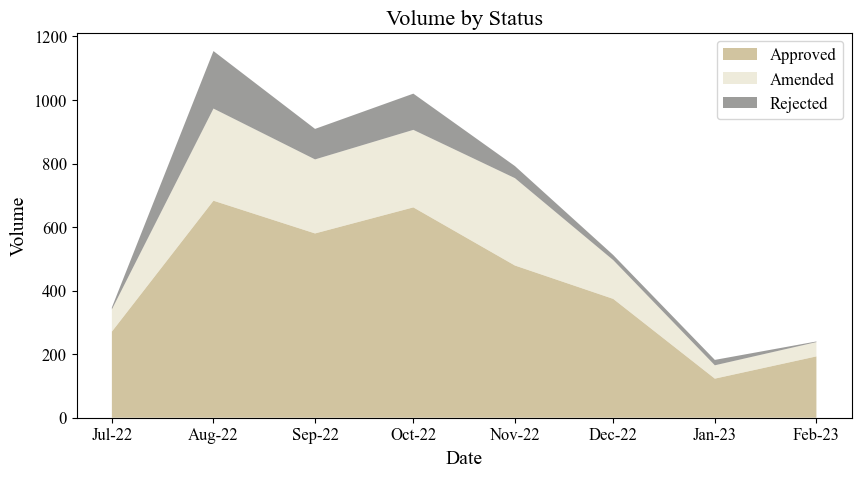

In [17]:
# set the font family and size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# set the figure size
fig, ax = plt.subplots(figsize=(10, 5))

# slice the volume_by_status_df dataframe to exclude the last 4 rows
volume_by_status_df_slice = volume_by_status_df.iloc[:-4]

# set the line and fill colors
line_colors = ['#3b3a37','#a58b42','#dfd8b8']
fill_colors = ['#a58b4280','#dfd8b880','#3b3a3780']

# create the stacked filled line graph with the specified colors
plt.stackplot(volume_by_status_df_slice.index, volume_by_status_df_slice.T, labels=volume_by_status_df_slice.columns,
              colors=fill_colors, linewidth=1.5)
plt.title('Volume by Status',fontname='Times New Roman',fontsize=16)
plt.xlabel('Date',fontname='Times New Roman', fontsize=14)
plt.ylabel('Volume',fontname='Times New Roman',fontsize=14)
plt.legend(loc='upper right')

# set the x-axis tick formatter to display the date in "mmm-yy" format
date_fmt = mdates.DateFormatter('%b-%y')
plt.gca().xaxis.set_major_formatter(date_fmt)

# add data labels for each point in the line graph

#for col in volume_by_status_df_slice.columns:
#    for i, y in enumerate(volume_by_status_df_slice[col]):
#        if not np.isnan(y):
#            plt.text(volume_by_status_df_slice.index[i], y, int(y), ha='center', va='top')

# display the graph
plt.show()

In [18]:
for col in volume_by_status_df_slice.columns:
    for i, y in enumerate(volume_by_status_df_slice[col]):
        if not np.isnan(y):
            print(str(volume_by_status_df_slice.index[i]))

2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00
2022-11-01 00:00:00
2022-12-01 00:00:00
2023-01-01 00:00:00
2023-02-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00
2022-11-01 00:00:00
2022-12-01 00:00:00
2023-01-01 00:00:00
2023-02-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00
2022-11-01 00:00:00
2022-12-01 00:00:00
2023-01-01 00:00:00
2023-02-01 00:00:00
